# Machine Learning and Statistics Assignment 2023
***
## Linear regression.

### Objectives of this notebook:
1. Show how scipy can be used to perform linear regression.
2. Find an appropriate data set online or elsewhere on which to perform linear regression.
3. Demonstrate how to perform linear regression on the data set.

## Introduction
***
Regression analysis is one of the most important fields in statistics and machine learning. 
Regression searches for relationships among variables. Generally, in regression analysis, you consider some phenomenon of interest and have a number of observations. Each observation has two or more features. Following the assumption that at least one of the features depends on the others, you try to establish a relation among them.[1]

Linear regression is one of the simplest and widely used regression techniques. There are two kinds of Linear Regression Model:<br>
-	Simple Linear Regression: A linear regression model with one independent and one dependent variable.<br>
-	Multiple Linear Regression: A linear regression model with more than one independent variable and one dependent variable.

![simple and multipleregression ](img/regr.svg)

Linear regression is used in many different fields including economics, computer science, and the social sciences. Here are some examples:
* Can be used to predict what the price of a product will be in the future, whether prices will go up or down.
* Can be used to determine the economic growth of a country in the upcoming quarter. It can also be used to predict a nation’s gross domestic product (GDP).
* Predicting the salary of a person based on years of experience.
* Predict exam performance based on study/revision time.

Simple linear regression is used to model the relationship between two continuous variables. We try to find the relationship between a single independent variable (input, the predictor variable) and a corresponding dependent variable (output). This can be expressed in the form of a straight line. 

$Y = \beta_0 + \beta_1X + \epsilon$

1. Y represents the output or dependent variable.
2. $\beta_0$ and $\beta_1$ are two unknown constants that represent the intercept and coefficient (slope) respectively.
3. $\epsilon$ (Epsilon) is the error term.

### Assumptions

When using linear regression for analysis, we need to make sure that data passes 4 main assumptions:
1. Linear relationship: The relationship between the dependent and independent variables is linear (can be expressed in a from of straight line). Easy to test with the scatter plot of x vs y.
2. Independence: The observations are independent of each other.
3. Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.
4. Normality: residuals/errors of the regression line are approximately normally distributed. Can be checked using histogram or normal probability plot.

If one or more of these assumptions are violated, then the results of our linear regression may be unreliable or even misleading. Let's have a look at a few examples below: 

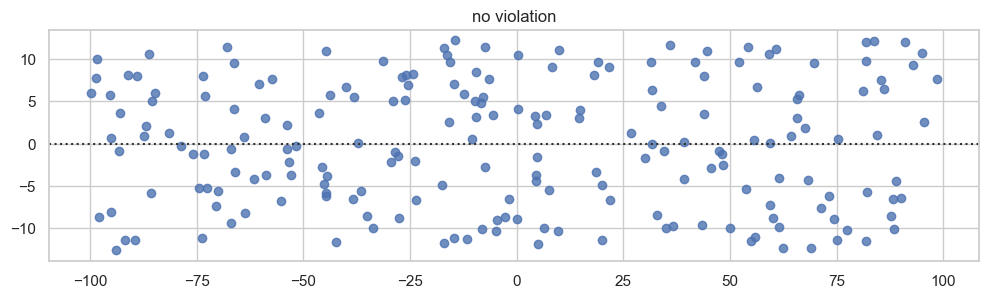

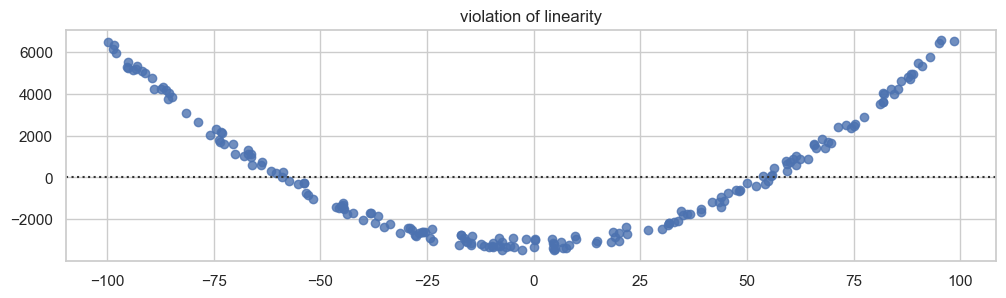

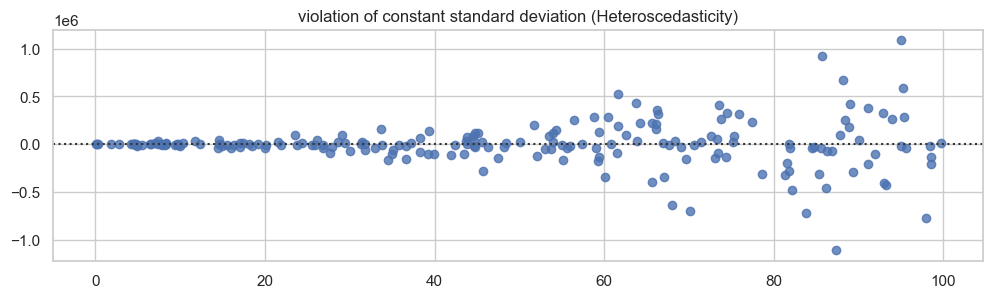

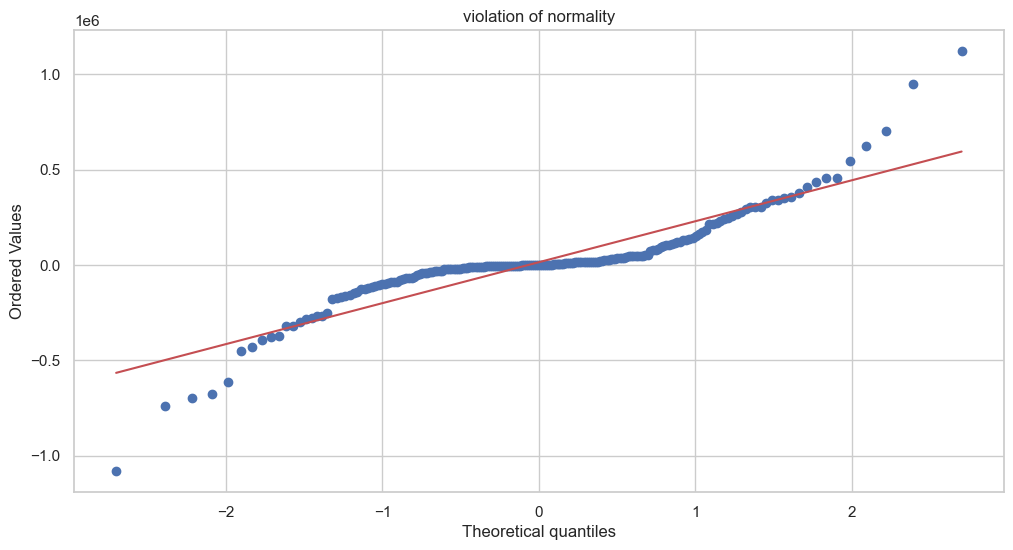

In [1]:
# importing necessary libraries
# Data frames
import pandas as pd
import numpy as np
# Packages for plotting
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as ss

sns.set_theme(style="whitegrid")

#selecting random seed
rs = np.random.RandomState(7)
# creating 200 uniformally distributed points for x in range (-100,100) 
n = 200
x = rs.uniform(-100, 100, n)
# defining y1, y2, y3
y1 = 5 * x + rs.uniform(0, 25, n)
y2 = x ** 2 + rs.uniform(0, 25**2, n)

# defining helper function to create epsilon(error variance)
def h(x):
    return 100+.5*x**2
# eps = abs(rs.normal(0, h(x), n))

eps = np.arange(0, n)*h(x)

y3 = 4*abs(x) + rs.normal(25, eps, n)

# plot 1, using y1
fig1 = plt.figure(figsize=(12, 3))
sns.residplot(x=x, y=y1, color="b")
plt.title("no violation")
plt.show()

# plot 2, using y2
fig2 = plt.figure(figsize=(12, 3))
sns.residplot(x=x, y=y2, color="b")
plt.title("violation of linearity")
plt.show()

# plot 3, using y3
fig3 = plt.figure(figsize=(12, 3))
sns.residplot(x=abs(x), y=y3, color="b")
plt.title("violation of constant standard deviation (Heteroscedasticity)")
plt.show()

# plot 4, using y3
fig4 = plt.figure(figsize=(12, 6))
fig4=ss.probplot(x=y3, plot = plt)
plt.title("violation of normality")
plt.show()

1. First plot doesn't violate any assumptions and is good to use; 
2. Second violates linear relationship (quadratic function); 
3. Third is violating Homoscedasticity assumption (heteroscedasticity), we can see that the residuals become much more spread out as the fitted values get larger. This “cone” shape is a classic sign of heteroscedasticity;
4. Fourth violates normality assumption -  data points do not fall into the straight line.

Only in the first plot the residuals are fairly well distributed around zero, whereas in the second and the third plots this is not the case; thus, indicating that the linear model assumptions for that model are not fulfilled. In the fourth plot the same parameter y3 is issued as in the third plot to demonstrate that it violates normality assumption.

### Using `scipy` for linear regression
There are many packages in Python which are used in performing regression analysis, the most commonly used ones are: NumPy, scikit-learn and statsmodels. However to achieve objectives of this assessment we going to concentrate on using scipy and its linregress() function:

`scipy.stats.linregress(x, y=None, alternative='two-sided')`

Parameters*<br>
    **x, y : array_like**<br>
       &emsp; Two sets of measurements.  Both arrays should have the same length.  If
        only `x` is given (and ``y=None``), then it must be a two-dimensional
        array where one dimension has length 2. <br>
    **alternative : {'two-sided', 'less', 'greater'}, optional**<br>
       &emsp; Defines the alternative hypothesis.
     The following options are available (default is 'two-sided'):<br>
       &emsp;&emsp; - two-sided: the slope of the regression line is nonzero<br>
       &emsp;&emsp; - less: the slope of the regression line is less than zero<br>
       &emsp;&emsp; - greater: the slope of the regression line is greater than zero<br>
    *Returns*<br>
    **result: `LinregressResult`**
    An object with the following attributes:<br>
        &emsp;&emsp; - **slope : float**<br>
        &emsp;&emsp;  Slope of the regression line.<br>
        &emsp;&emsp; -  **intercept : float**<br>
        &emsp;&emsp;  Intercept of the regression line.<br>
        &emsp;&emsp; - **rvalue : float**<br>
        &emsp;&emsp;    The Pearson correlation coefficient. The square of ``rvalue``
            is equal to the coefficient of determination.<br>
        &emsp;&emsp; - **pvalue : float**<br>
        &emsp;&emsp;    The p-value for a hypothesis test whose null hypothesis is
            that the slope is zero, using Wald Test with t-distribution of
            the test statistic.<br>
        &emsp;&emsp; - **stderr : float**<br>
        &emsp;&emsp;    Standard error of the estimated slope (gradient), under the
            assumption of residual normality.<br>
        &emsp;&emsp; - **intercept_stderr : float**<br>
        &emsp;&emsp;    Standard error of the estimated intercept, under the assumption
            of residual normality.

### Anscombe’s quartet
Before proceeding with the examples of using scipy.stats.linregress to analyse a dataset I think it's necessary to highlight the importance of looking at a set of data graphically before starting to analyse according to a particular type of relationship. To do this we going to use a well-known [Anscombe's quartet](https://en.wikipedia.org/wiki/Anscombe%27s_quartet).[3] 

It consists of a set of four dataset, with almost identical descriptive statistical properties in terms of means, variance, R-Squared, correlations, and linear regression lines however when plotted on a scatter plot have very different visual representation. The datasets were created by the statistician Francis Anscombe in 1973 to demonstrate the importance  of exploratory data analysis and the drawbacks of depending only on summary statistics. It also emphasizes the importance of using data visualization to spot trends, outliers, and other crucial details that might not be obvious from summary statistics alone.[4]

Anscombe's quartet consists of four data sets (I, II, II, IV). It is included in the seaborn package

In [2]:
anscombe = sns.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


We want to calculate some descriptive statistical measures for each dataset. We going to calculate the following properties for all four datasets:
* means
* standard deviations
* correlations
* slope and intercept 
* R-square

To do this we need to split Anscombe's dataset into 4 separate ones.

In [3]:
# splitting dataset into 4
ds_1 = anscombe.query("dataset == 'I'")
ds_2 = anscombe.query("dataset == 'II'")
ds_3 = anscombe.query("dataset == 'III'")
ds_4 = anscombe.query("dataset == 'IV'")

In [4]:
# Calculating means and standard deviation
# mean values for x
x1_mean = ds_1['x'].mean()
x2_mean = ds_2['x'].mean()
x3_mean = ds_3['x'].mean()
x4_mean = ds_4['x'].mean()

# mean values for y
y1_mean = ds_1['y'].mean()
y2_mean = ds_2['y'].mean()
y3_mean = ds_3['y'].mean()
y4_mean = ds_4['y'].mean()

# Standard deviation values for x
x1_std = ds_1['x'].std()
x2_std = ds_2['x'].std()
x3_std = ds_3['x'].std()
x4_std = ds_4['x'].std()

# Standard deviation values for y
y1_std = ds_1['y'].std()
y2_std = ds_2['y'].std()
y3_std = ds_3['y'].std()
y4_std = ds_4['y'].std()

Next, we going to calculate correlation using `np.corrcoef()`, can be found at[here] (https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html). As it returns correlation coefficient matrix, we are specifying that we want 1 value by adding [0,1] - location of the value.

To calculate Linear Regression slope and intercept, we going to use `np.polyfit()` function, can be found [here] (https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html). We provide values of x and y and specify degree of the polynomial in our case as it's linear, deg=1. Function returns an array of polynomial coefficients.

In [5]:
# Calculating correlation 
correlation_x1y1 = np.corrcoef(ds_1['x'],ds_1['y'])[0,1]
correlation_x2y2 = np.corrcoef(ds_2['x'],ds_2['y'])[0,1]
correlation_x3y3 = np.corrcoef(ds_3['x'],ds_3['y'])[0,1]
correlation_x4y4 = np.corrcoef(ds_4['x'],ds_4['y'])[0,1]

# Calculating Linear Regression slope and intercept 
m1,c1 = np.polyfit(ds_1['x'],ds_1['y'], 1)
m2,c2 = np.polyfit(ds_2['x'],ds_2['y'], 1)
m3,c3 = np.polyfit(ds_3['x'],ds_3['y'], 1)
m4,c4 = np.polyfit(ds_4['x'],ds_4['y'], 1)

To find R-square first find residual sum of square error and Total sum of square error.<br>
The sum of squares of residuals, also called the residual sum of squares:
\begin{equation*}
RSS = \sum_i (y_i - f_i)^2
\end{equation*}
where $f_i= mx + c$

The total sum of squares (proportional to the variance of the data):
\begin{equation*}
TSS = \sum_i (y_i - \bar{y})^2
\end{equation*}
where $\bar{y}$ is the mean of the observed data

Finally coefficient of determination can be calculated as
\begin{equation*}
R^2 = 1 - \frac{RSS}{TSS}
\end{equation*}

In [6]:
# Residual sum of squares error
RSSY_1 = ((ds_1['y'] - (m1*ds_1['x']+c1))**2).sum()
RSSY_2 = ((ds_2['y'] - (m2*ds_2['x']+c2))**2).sum()
RSSY_3 = ((ds_3['y'] - (m3*ds_3['x']+c3))**2).sum()
RSSY_4 = ((ds_4['y'] - (m4*ds_4['x']+c4))**2).sum()
 
# Total sum of squares
TSS_1 = ((ds_1['y'] - y1_mean)**2).sum()
TSS_2 = ((ds_2['y'] - y2_mean)**2).sum()
TSS_3 = ((ds_3['y'] - y3_mean)**2).sum()
TSS_4 = ((ds_4['y'] - y4_mean)**2).sum()
 
# R squared (coefficient of determination)
R2_1  = 1 - (RSSY_1 / TSS_1)
R2_2  = 1 - (RSSY_2 / TSS_2)
R2_3  = 1 - (RSSY_3 / TSS_3)
R2_4  = 1 - (RSSY_4 / TSS_4)

In [7]:
# Create a pandas dataframe to represent the summary statistics
summary_stats = pd.DataFrame({'Mean_x': [x1_mean, x2_mean, x3_mean, x4_mean],
                              'Variance_x': [x1_std**2, x2_std**2, x3_std**2, x4_std**2],
                              'Mean_y': [y1_mean, y2_mean, y3_mean, y4_mean],
                              'Variance_y': [y1_std**2, y2_std**2, y3_std**2, y4_std**2],
                              'Correlation': [correlation_x1y1, correlation_x2y2, correlation_x3y3, correlation_x4y4],
                              'Linear Regression slope': [m1, m2, m3, m4],
                              'Linear Regression intercept': [c1, c2, c3, c4],
                              'R-square': [R2_1, R2_2, R2_3, R2_4],
                             },
index = ['I', 'II', 'III', 'IV'])
print(summary_stats.T)

                                     I         II        III         IV
Mean_x                        9.000000   9.000000   9.000000   9.000000
Variance_x                   11.000000  11.000000  11.000000  11.000000
Mean_y                        7.500909   7.500909   7.500000   7.500909
Variance_y                    4.127269   4.127629   4.122620   4.123249
Correlation                   0.816421   0.816237   0.816287   0.816521
Linear Regression slope       0.500091   0.500000   0.499727   0.499909
Linear Regression intercept   3.000091   3.000909   3.002455   3.001727
R-square                      0.666542   0.666242   0.666324   0.666707


From the summary table above we can see that all of the main statistics for four datasets are either exactly the same or very close to each another. Now, let's visualize the data and plot the Anscombe's data set, including the regression line. We can do this using `sns.lmplot()`, more [here](https://seaborn.pydata.org/generated/seaborn.lmplot.html), where

**data:** DataFrame. Dataframe where each column is a variable and each row is an observation. <br>
**x,y:** strings. Axes names.<br>
**col:** strings. Variables that define subsets of the data, which will be drawn on separate facets in the grid. In our case as there are 4 distinct valuesin column "dataset" we will have 4 plots.<br>
**ci:** int in [0, 100] or None. Size of the confidence interval for the regression estimate. In our case ci=95.<br>

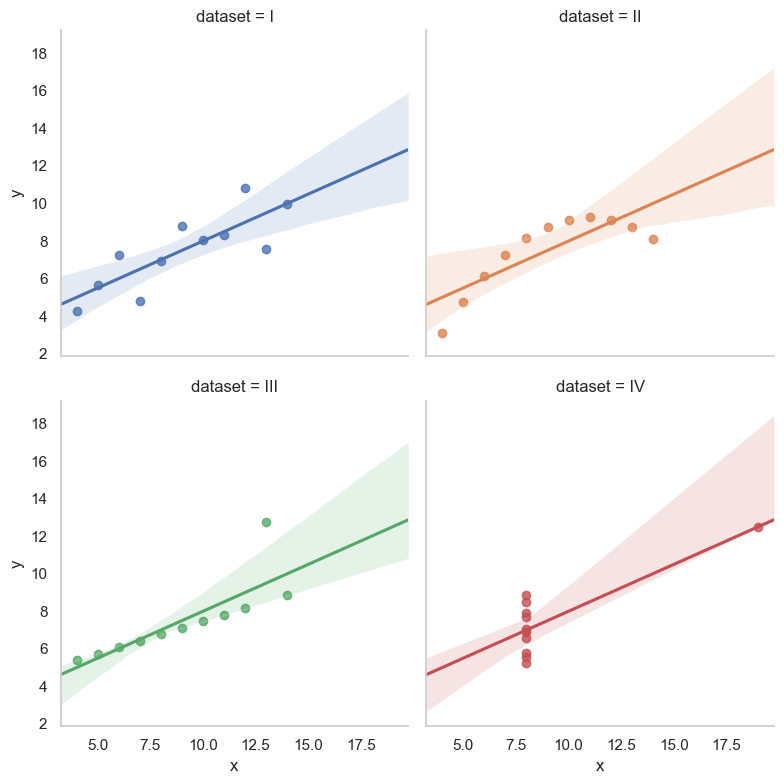

In [8]:
sns.set_style("whitegrid", {'axes.grid' : False})
sns.lmplot(
    x="x", 
    y="y", 
    data=anscombe, 
    hue="dataset", 
    col="dataset", 
    col_wrap=2, 
    truncate=False,
    ci=95,
    height=4,
)

After plotting the datasets we can see that they look very different form each other. In thirst dataset there seems to be a linear relationship between x and y, for second it's non-linear. Third one seem to have linear relationship as well but has one outliner which is very far away from the line. The fourth one(bottom right) shows an example when one high-leverage point is enough to produce a high correlation coefficient. 

### Example 1
***
Now, lets take a look at couple of examples and perform a linear regression analysis. As first example we can use public data published by the [UK Met Office](https://www.metoffice.gov.uk). We going to use data which was collected at Heathrow airport. Since global warming is a "hot" topic at the moment, let's see if we can spot an upward trend in temperature. Simple regression model can help us with this task.

In [9]:
# For downloading.
import urllib.request as urlrq
import pandas as pd 
from scipy import stats

# URL to metoffice.gov.uk data for Heathrow airport
urlHeathrow = 'https://www.metoffice.gov.uk/pub/data/weather/uk/climate/stationdata/heathrowdata.txt'

# Create a file path for the original data. Saving it as txt
pathxtxt= 'data/heathrow.txt'

# Save retrieved URL to the file
urlrq.urlretrieve(urlHeathrow, pathxtxt)

('data/heathrow.txt', <http.client.HTTPMessage at 0x7fa8e4291370>)

In [10]:
# When quickly looking at the data, we can notice that dataset isn't nicely formatted. There is unenven spacing 
# between columns and additional column appeares for 2023. First 5 rows is just general info,
#  so we going to skip them. I also decided to name the columns myself so we going to skip 
# the headings as well. Column "Extra" is added because there is an additional column for year 2023 indicating that
# the data is provisional.
columns=["Year", "Month", "Tmax", "Tmin", "Af", "Rain", "Sun", "Extra"]

# read text file into pandas DataFrame.
# the other way we could have done it after reading the dataset is #df1 = df.iloc[4:]
df = pd.read_csv("data/heathrow.txt", sep="\s+", skiprows=7, skipinitialspace = True, header=None, names =columns)

# display DataFrame
print(df)

     Year  Month  Tmax  Tmin   Af  Rain     Sun        Extra
0    1948      1   8.9   3.3  ---  85.0     ---          NaN
1    1948      2   7.9   2.2  ---  26.0     ---          NaN
2    1948      3  14.2   3.8  ---  14.0     ---          NaN
3    1948      4  15.4   5.1  ---  35.0     ---          NaN
4    1948      5  18.1   6.9  ---  57.0     ---          NaN
..    ...    ...   ...   ...  ...   ...     ...          ...
902  2023      3  11.5   5.2    1  92.4   60.2#  Provisional
903  2023      4  14.6   5.9    0  65.8  151.1#  Provisional
904  2023      5  18.6   9.3    0  38.4  196.6#  Provisional
905  2023      6  25.3  13.5    0  56.8  250.2#  Provisional
906  2023      7  22.9  14.0    0  61.4  150.1#  Provisional

[907 rows x 8 columns]


In [11]:
df = df.drop(columns=['Af', 'Extra'])
df

,Year,Month,Tmax,Tmin,Rain,Sun
0,1948,1,8.9,3.3,85.0,---
1,1948,2,7.9,2.2,26.0,---
2,1948,3,14.2,3.8,14.0,---
3,1948,4,15.4,5.1,35.0,---
4,1948,5,18.1,6.9,57.0,---
...,...,...,...,...,...,...
902,2023,3,11.5,5.2,92.4,60.2#
903,2023,4,14.6,5.9,65.8,151.1#
904,2023,5,18.6,9.3,38.4,196.6#
905,2023,6,25.3,13.5,56.8,250.2#


In [12]:
# Spot check a random row.
df.iloc[50]

Year     1952
Month       3
Tmax     10.6
Tmin      3.8
Rain     65.3
Sun       ---
Name: 50, dtype: object

In [13]:
# Removing # from Sun field
cols = ['Sun']
for col in cols:
    df[col] = df[col].map(lambda x: str(x).rstrip('#'))

In [14]:
# Now let's have a quick look at the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 907 entries, 0 to 906
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    907 non-null    int64  
 1   Month   907 non-null    int64  
 2   Tmax    907 non-null    float64
 3   Tmin    907 non-null    float64
 4   Rain    907 non-null    object 
 5   Sun     907 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 42.6+ KB


In [15]:
df.describe()

,Year,Month,Tmax,Tmin
count,907.000000,907.000000,907.000000,907.000000
mean,1985.293275,6.480706,14.987211,7.132415
std,21.831939,3.452039,5.804580,4.467027
min,1948.000000,1.000000,0.800000,-4.600000
25%,1966.000000,3.000000,9.900000,3.400000
50%,1985.000000,6.000000,14.800000,6.700000
75%,2004.000000,9.000000,20.100000,11.200000
max,2023.000000,12.000000,28.300000,16.700000


Looks good. The first two columns (year, month) are integres, Temperatures are floats; the last two are objects, but as we not going to use them for our analysis this time, it doesn't really matter. 

For this example I'm going to use years from 1960 till 2023, so lets get rid of the rows we don't need before saving our data to .csv file.

In [16]:
rslt_df = df[(df['Year'] >1959) &
          (df['Year'] < 2023)]
rslt_df

,Year,Month,Tmax,Tmin,Rain,Sun
144,1960,1,6.9,1.8,47.9,34.4
145,1960,2,7.9,1.6,48.0,80.1
146,1960,3,10.2,4.5,33.9,65.0
147,1960,4,14.3,4.6,12.4,156.1
148,1960,5,18.4,9.3,45.6,181.7
...,...,...,...,...,...,...
895,2022,8,27.0,15.9,54.4,234.3
896,2022,9,20.2,11.8,86.0,119.1
897,2022,10,18.3,10.4,81.4,132.8
898,2022,11,13.2,7.6,123.8,69.9


In [17]:
# Now we can save our cleaned data into .csv file
rslt_df.to_csv('data/weather.csv')

Now that we have mostly cleaned and saved our data in .csv format let's start with analysis. For this example let's check how the temperature changes in July (that normally being the warmest summer month). The maximum temperature in each month is given in the column Tmax.

So, we create the dataframe july from weather by selecting only the month of July('Month == 7') and then we copy just the columns Year and Tmax.

The result is dataframe that contains the maximum temperature, in Heathrow (London), in the month of July for the years 1960 to 2022.

In [18]:
weather = pd.read_csv('data/weather.csv')
july = weather.query('Month == 7')[['Year','Tmax']]

<Axes: title={'center': 'Max temperature in July'}, xlabel='Year', ylabel='Tmax'>

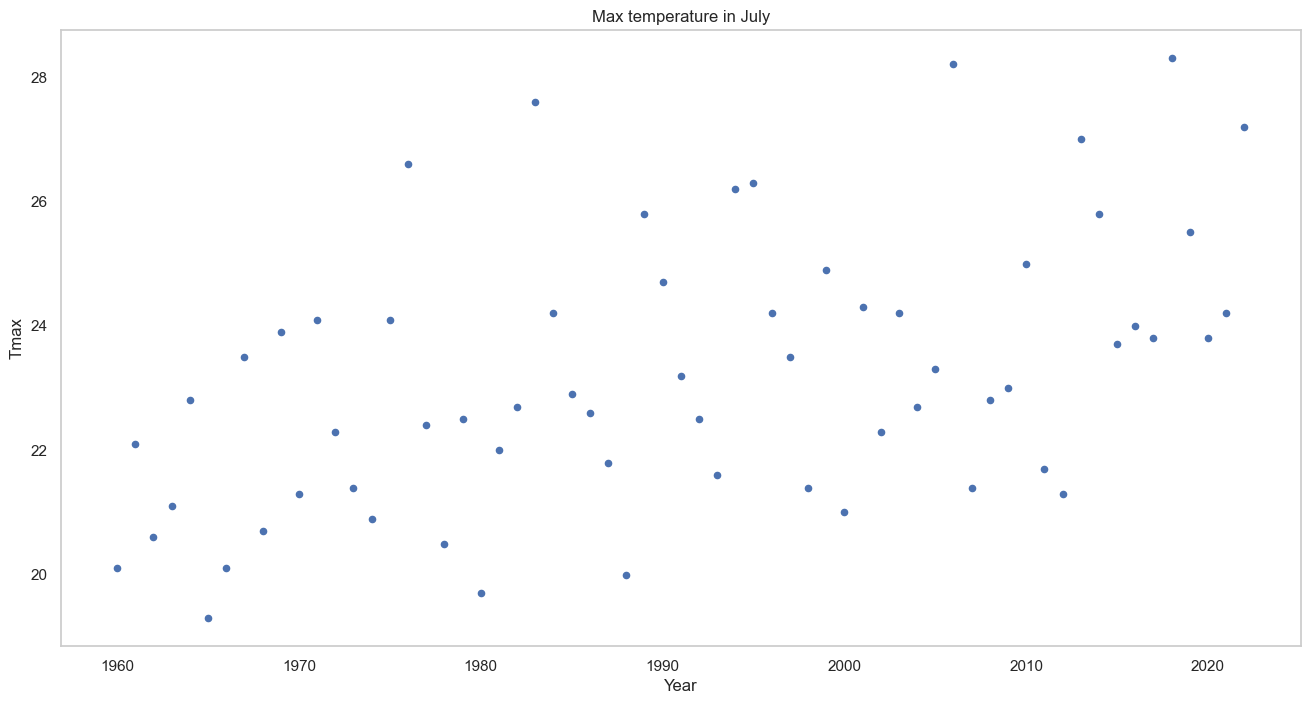

In [19]:
# draw a scatter plot using the scatter function from Pandas.
july.plot.scatter(y='Tmax',x='Year', figsize = (16,8), title='Max temperature in July')

It's hard to spot a trend here as dots seem to be all over the place. However we can still see that there are less dots in upper left and lower right corner, suggesting that there are fewer higher temperatures in the early years and fewer lower temperatures in the later ones.

To check if this is true we’ll build a simple linear regression model using SciPy’s `stats.linregress()` function. And we going to pass two paremeters to it `x= Year, y=Tmax`.

As a result of running linregress function we getting an object that contains the parameters for the model. We will use the values of the intercept and the slope to calculate a list of values that represent the regression line and add them to a new dataframe column called `trend`.

In [20]:
x = july['Year']
y = july['Tmax']
m = stats.linregress(x, y)
t = [m.slope * i + m.intercept for i in x]
july.insert(len(july.columns),'trend',t)


<Axes: title={'center': 'Max temperature in July with a trend line'}, xlabel='Year', ylabel='Tmax'>

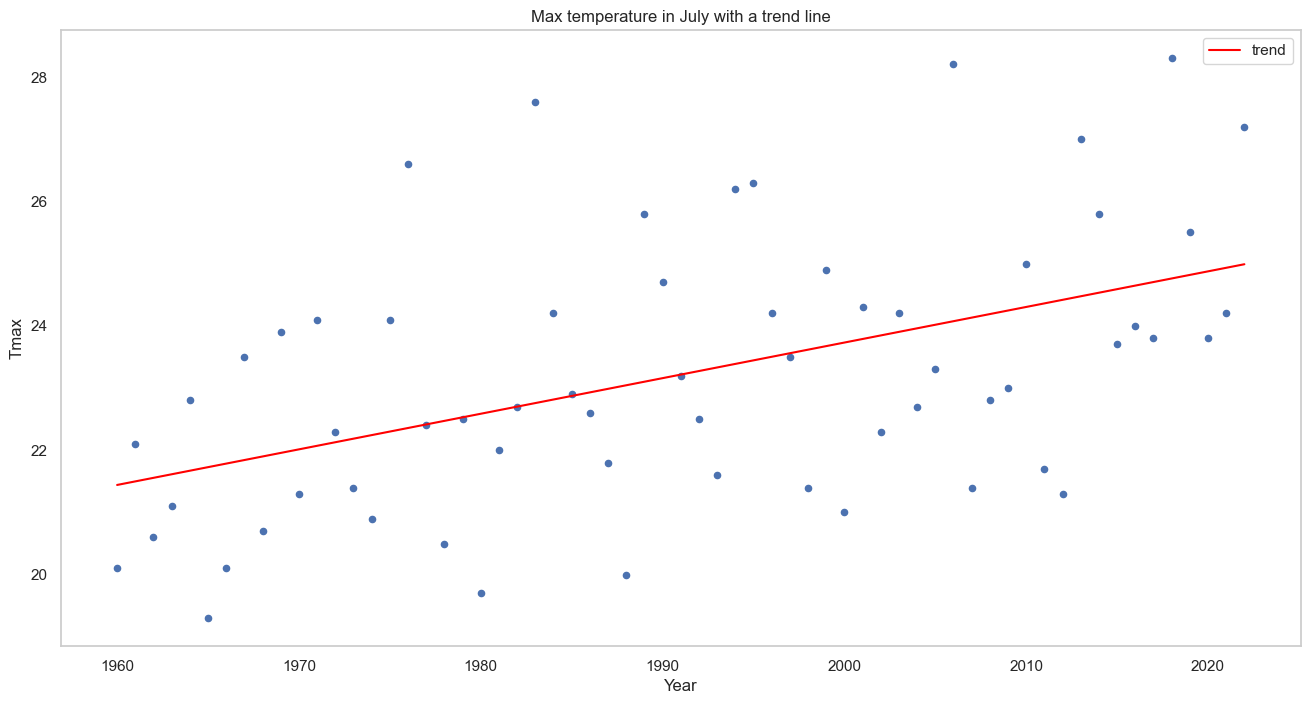

In [21]:
# plot the original scatter chart along with a line chart for the trend.
ax = july.plot.scatter(x='Year', y='Tmax', title='Max temperature in July with a trend line')
july.plot.line(x='Year', y='trend', color='red', ax=ax,
figsize = (16,8))

We can clearly an upward trend now. And if we look at the dataframewe can see that our trend line shows an increase of more than 3ºC over the period from 1960 to 2023.

In [22]:
july

,Year,Tmax,trend
6,1960,20.1,21.442212
18,1961,22.1,21.499427
30,1962,20.6,21.556642
42,1963,21.1,21.613857
54,1964,22.8,21.671072
...,...,...,...
702,2018,28.3,24.760674
714,2019,25.5,24.817889
726,2020,23.8,24.875104
738,2021,24.2,24.932319


Even though we could spot increase intemperature by just looking at the data, adding a regression line makes this task much easier. In this example we have seen how a regression line can be helpful in spotting patterns.

### Example 2
***

In this example we going to use Gross Domestic Product (GDP) for the G7 group of countries, the data is provided by provided by the Organisation for Economic Co-operation and Development and is publicly accessible from [here](https://stats.oecd.org/Index.aspx?DatasetCode=SNA_TABLE1).

GDP is a measure of the size of the economy, the total economic activity in a country.  It is the most important indicator of how a country is doing financially and measures the "wealth" of the country.[5] In this dataset GDP is measured overtime from 2007 to 2023 which in this case can show us economic growth of countries for this period.

Data is recorded for each quarter in a year and each value is relative to GDP in 2015. GDP in 2015 is taken to be 100, so if a country has a GDP figure of, for example 75.2 in the first quarter of 2007, this means that the actual GDP was 75.2% of the value of that country’s GDP in 2015.

Normally GDP increases over time, we can notice that the data is a a littlelower than 100 before 2015 and a little higher in later years. Hovewer we can also spot some falls of it due to for example financial crash (2008) and Covid pandemic.

As example, let's have a look at GDP for Germany:

In [23]:
# loading file to pandas
gdp = pd.read_csv('data/QNA_13082023144437742.csv')

# we only want the volume data, VIXOBSA and we are only interested in Germany
germany = gdp[(gdp['MEASURE']=='VIXOBSA')
& (gdp['Country']=='Germany')]
# reduce the data by only copying the columns Period and Value (the GDP figure).
germany = germany[['Period','Value']]
germany

,Period,Value
525,Q1-2007,91.879995
526,Q2-2007,92.659995
527,Q3-2007,93.129999
528,Q4-2007,93.730001
529,Q1-2008,94.330003
...,...,...
586,Q2-2022,107.909998
587,Q3-2022,108.300000
588,Q4-2022,107.860007
589,Q1-2023,107.759997


Text(0.5, 1.0, "Germany's GDP")

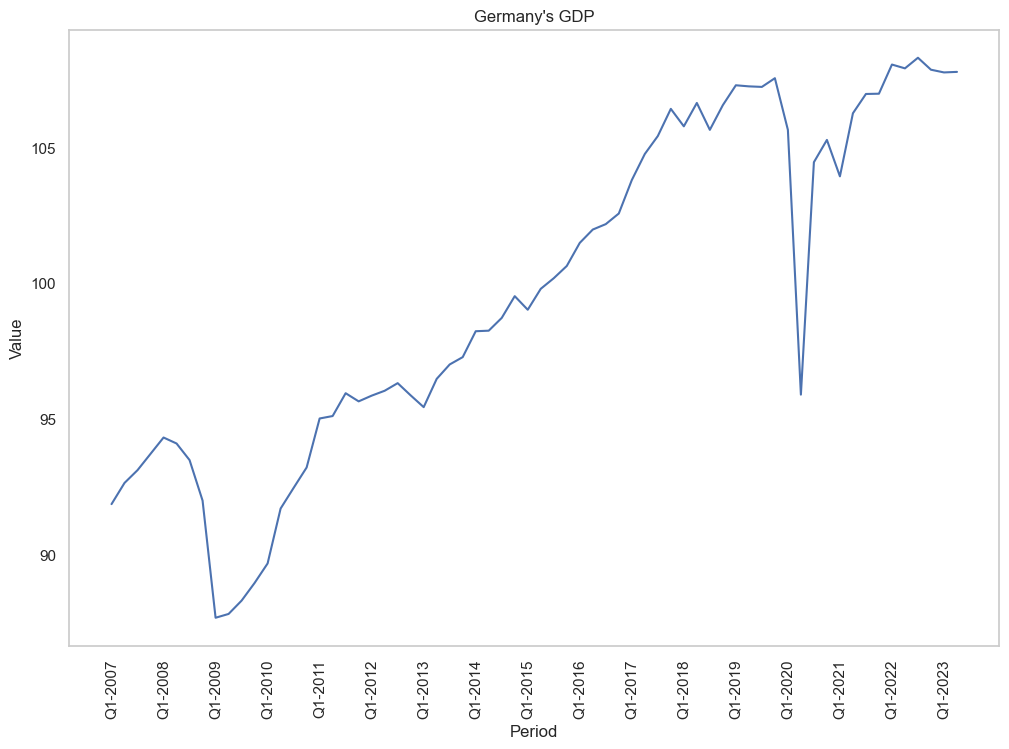

In [24]:
# defining plot size
plt.figure(figsize=(12,8))
# rotating x labels
plt.xticks(rotation=90)
g= sns.lineplot(data=germany, x='Period', y='Value')
# displaying every 4th labe as overwise it's too clutered 
for ind, label in enumerate(g.get_xticklabels()):
    if ind % 4 == 0:  # every 4th label is kept
        label.set_visible(True)
    else:
        label.set_visible(False)
plt.title("Germany's GDP")

The graph is confirming what we have expected and we can clearly see two significant drops in it, one 2008-2009 and another around 2020, for the latter one we can see that the drop was more dramatic however German economy seem to recover faster from it than the first.

Now let's have a look for GDP data for G7 countries. We can apply the same filtering as we did for Germany:

In [28]:
G7data = gdp[(gdp['MEASURE']=='VIXOBSA')
& (gdp['Country']=='G7')]
G7data = G7data[['Period','Value']]
G7data

,Period,Value
1380,Q1-2007,92.374213
1381,Q2-2007,92.891448
1382,Q3-2007,93.250649
1383,Q4-2007,93.693513
1384,Q1-2008,93.760634
...,...,...
1440,Q1-2022,110.117080
1441,Q2-2022,110.362340
1442,Q3-2022,110.877311
1443,Q4-2022,111.211718


Again we are getting the dataframe from 2007 to 2023. The Period column is not a in very useful format so we going to add a new one called `yr`. This column will represent the year for a particular entry starting from 0. Quarter is equal to 0.25, so for Q1 2007 `yr = 0.25`. This numeric column makes creating the model easier.

In [29]:
def calcyr(x,data):
    # Adding values of column "Period" into variable d
    d = data['Period'].values[x]
    # Slicing d to get quarter number(which we mutiply by 0.25 to get quarter) and year and converting to integer. 
    # substructing 2007 as we want the year to start from 0
    y= int(d[-4:])+int(d[1:2])*0.25 - 2007
    return y
# Calculating our "year" value for each data point by using the function above
yr=[calcyr(x,G7data) for x in range(len(G7data)) ]
# Adding the result into new column "yr"
G7data['yr'] = yr

# View result
G7data

,Period,Value,yr
1380,Q1-2007,92.374213,0.25
1381,Q2-2007,92.891448,0.50
1382,Q3-2007,93.250649,0.75
1383,Q4-2007,93.693513,1.00
1384,Q1-2008,93.760634,1.25
...,...,...,...
1440,Q1-2022,110.117080,15.25
1441,Q2-2022,110.362340,15.50
1442,Q3-2022,110.877311,15.75
1443,Q4-2022,111.211718,16.00


Now we can make the model using `scipy.stats` linear regression formula as we have done in Example 1 and plot a scatter diagram of the original data with the regression plot on it.

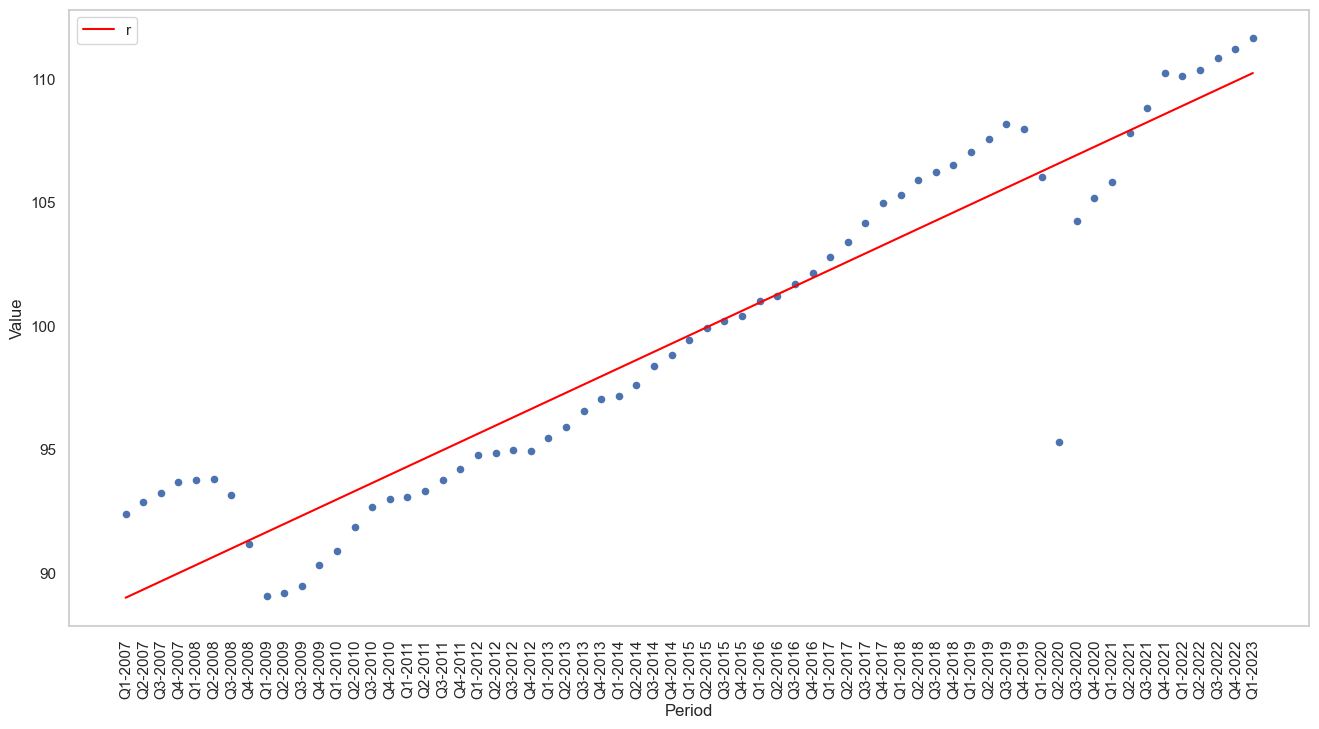

In [30]:
# Defining x and y
x = G7data['yr']
y = G7data['Value']

# Using function for linear regression to get slope and intercept
m = stats.linregress(x, y)
t = [m.slope * i + m.intercept for i in x]

G7data.insert(len(G7data.columns),'r',t)
# Plotting GDP data points
ax = G7data.plot.scatter(x='Period', y='Value')
# Plotting linear regression line
ax = G7data.plot.line(x='Period', y='r', color='red',
                        ax=ax, figsize = (16,8), rot=90)

NameError: name 'G7' is not defined

## References
***
1. https://realpython.com/linear-regression-in-python/#linear-regression
2. https://statistics.laerd.com/spss-tutorials/linear-regression-using-spss-statistics.php
3. https://en.wikipedia.org/wiki/Anscombe%27s_quartet
4. https://www.geeksforgeeks.org/anscombes-quartet/
5. https://www.cso.ie/en/interactivezone/statisticsexplained/nationalaccountsexplained/grossdomesticproductgdp/

## End